# Lista de Exercícios 1

Essa lista de exercícios foi implementada utilizando a linguagem <i>Python</i> em sua versão 3.7.5, com o uso das bibliotecas <i>OpenCV</i>, <i>Numpy</i> e <i>Matplotlib</i> para facilitar a manipulação de matrizes e arquivos de imagem. Esse relatório está sendo confeccionado utilizando <i>Jupyter Notebook</i>. 

## Exercício 1
Neste primeiro exercício, foi pedido que fosse carregado uma imagem digital em níveis de cinza. A imagem escolhida foi uma presente no <i>Oxford Buildings Dataset</i>, como pode ser observado a seguir.  

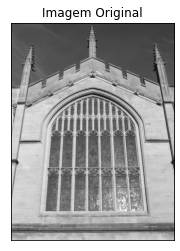

In [73]:
import cv2 
import numpy as np
from matplotlib import pyplot as plt

#carregando a imagem
img = cv2.imread("images//all_souls_000003.jpg", cv2.IMREAD_GRAYSCALE)
#mostrando imagem
plt.imshow(img, cmap = "gray")
plt.xticks([]), plt.yticks([])
plt.title("Imagem Original")
plt.show()

E então foi feita a geração de uma segunda imagem com as mesmas dimensões da primeira, porém a intensidade do seus níveis de cinza de cada pixel fosse proporcional a sua posição em x. A imagem gerada está apresentada abaixo. Para a geração da imagem, foi utilizada a função da biblioteca <i>Numpy</i>, que cria uma matriz com as dimensões passadas com valores 1 em todas as posições. Após isso, o valor dos pixels foi modificado um a um de acordo com os parâmetros ditos anteriormente. 

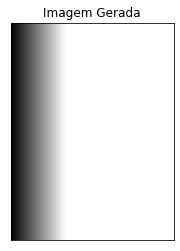

In [74]:
#gerando a I'
imgGeradaX = np.ones((img.shape[0],img.shape[1],1),np.uint8)*255
for i in range(imgGeradaX.shape[0]):
    for j in range(imgGeradaX.shape[1]):
        if j <= 255:
            imgGeradaX[i, j, 0] = j
        else:
            imgGeradaX[i, j, 0] = 255
plt.imshow(imgGeradaX, cmap = "gray")
plt.xticks([]), plt.yticks([])
plt.title("Imagem Gerada")
plt.show()

E finalmente, a soma das duas imagens é calculada:

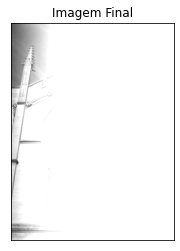

In [75]:
#somando imagens
imgFinal = cv2.add(img, imgGeradaX)
plt.imshow(imgFinal, cmap = "gray")
plt.xticks([]), plt.yticks([])
plt.title("Imagem Final")
plt.show()

## Exercício 2
No segundo exercício, foi criada uma imagem de maneira análoga ao exercício anterior, porém os níveis de cinza dos pixels variam de acordo com a sua posição em y. 

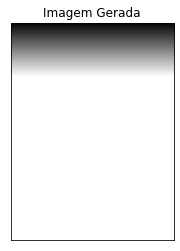

In [76]:
imgGeradaY = np.ones((img.shape[0],img.shape[1],1),np.uint8)*255
for i in range(imgGeradaY.shape[0]):
    for j in range(imgGeradaY.shape[1]):
        if i <= 255:
            imgGeradaY[i, j, 0] = i
        else:
            imgGeradaY[i, j, 0] = 255
plt.imshow(imgGeradaY, cmap = "gray")
plt.xticks([]), plt.yticks([])
plt.title("Imagem Gerada")
plt.show()

E da mesma forma, foi feita uma soma entre a imagem original e a segunda imagem gerada. 

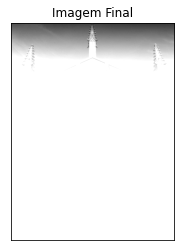

In [77]:
imgFinal = cv2.add(img, imgGeradaY)
plt.imshow(imgFinal, cmap = "gray")
plt.xticks([]), plt.yticks([])
plt.title("Imagem Final")
plt.show()

## Exercício 3
E por fim, foi realizada a soma das três imagens. Resultado pode ser observado na próxima figura. 

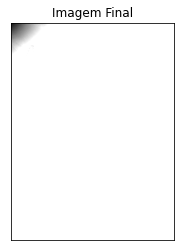

In [78]:
imgFinal = cv2.add(img, imgGeradaX)
imgFinal = cv2.add(imgFinal, imgGeradaY)
plt.imshow(imgFinal, cmap = "gray")
plt.xticks([]), plt.yticks([])
plt.title("Imagem Final")
plt.show()

## Exercício 4 
Neste exercício foram criadas funções para a realização das operações geométricas de maneira inversa. Para demonstração será usada a mesma imagem dos últimos exercícios. 

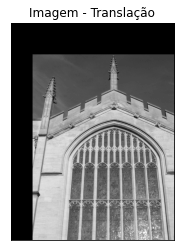

In [79]:
def Translacao(img, dx, dy):
    imgTrans = np.ones((img.shape[0],img.shape[1],1),np.uint8)*255
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            f = round(i - dy)
            g = round(j - dx)
            if f >= img.shape[0] or f <= 0 or g >= img.shape[1] or g <= 0:
                imgTrans[i, j] = 0
            else:
                imgTrans[i, j] = img[f, g]
    return imgTrans

imgTrans = Translacao(img, 100.3, 150.8)
plt.imshow(imgTrans, cmap = "gray")
plt.xticks([]), plt.yticks([])
plt.title("Imagem - Translação")
plt.show()

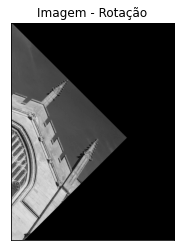

In [80]:
def Rotacao(img, angulo):
    imgRot = np.ones((img.shape[0],img.shape[1],1),np.uint8)*255
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            f = round(i*np.cos(angulo) - j*np.sin(angulo))
            g = round(i*np.sin(angulo) + j*np.cos(angulo))
            # print(f, g)
            if f >= img.shape[0] or f <= 0 or g >= img.shape[1] or g <= 0:
                imgRot[i, j] = 0
            else:
                imgRot[i, j] = img[f, g]
    return imgRot

imgRot = Rotacao(img, np.pi/4.)
plt.imshow(imgRot, cmap = "gray")
plt.xticks([]), plt.yticks([])
plt.title("Imagem - Rotação")
plt.show()

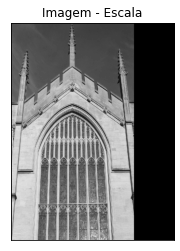

In [81]:
def Escala(img, sx, sy):
    imgEsc = np.ones((img.shape[0],img.shape[1],1),np.uint8)*255
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            f = round(i/sy)
            g = round(j/sx)
            # print(f, g)
            if f >= img.shape[0] or f <= 0 or g >= img.shape[1] or g <= 0:
                imgEsc[i, j] = 0
            else:
                imgEsc[i, j] = img[f, g]
    return imgEsc

imgEsc = Escala(img, 0.75, 1.25)
plt.imshow(imgEsc, cmap = "gray")
plt.xticks([]), plt.yticks([])
plt.title("Imagem - Escala")
plt.show()

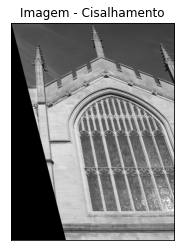

In [82]:
def Cisalha(img, cv, ch):
    imgCis = np.ones((img.shape[0],img.shape[1],1),np.uint8)*255
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            f = round(i - j*cv)
            g = round(j - i*ch)
            if f >= img.shape[0] or f <= 0 or g >= img.shape[1] or g <= 0:
                imgCis[i, j] = 0
            else:
                imgCis[i, j] = img[f, g]
    return imgCis

imgCis = Cisalha(img, 0, 0.25)
plt.imshow(imgCis, cmap = "gray")
plt.xticks([]), plt.yticks([])
plt.title("Imagem - Cisalhamento")
plt.show()